<h1 style="color: green; text-align: center"> Sentiment Analysis for Jumia Reviews </h1>
<hr width: 5px>
<h3>✍ written by : </h3>
<p><b>Maghouti</b> Aymane <br><b></b> Data engineering Student at the national school of applied sciences of alhociema <b>ENSAH</b></p>
<p style="text-align: right;"><b>23-December | <span style="color: red;">2023</span></b></p>

In [1]:
import pandas as pd 

In [2]:
data = pd.read_csv('final_data.csv')

In [5]:
data.isnull().sum()

Comments    0
Target      0
dtype: int64

- 1. `test_size=0.3` in the first split, meaning 70% of the data is used for the training set and 30% for the temporary set (which will be further split into a test set and a validation set).

- 2.  `test_size=0.5` in the second split, meaning half of the temporary data is used for the test set and the other half for the validation set.

- 3. The use of `stratify=data['Target']` ensures that the distribution of classes in the dataset sets (training, testing, and validation) will be similar to that of the original dataset.

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(data['Comments'], data['Target'], test_size=0.3, random_state=42,stratify=data['Target'])
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


- The TF-IDF vectorizer is employed  with the parameter ngram_range=(1,3),capturing unigrams, bigrams, and trigrams.

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(ngram_range=(1,3)) 
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_val_tfidf = tfidf_vectorizer.transform(X_val)

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [9]:
models = {
    'Multinomial Naive Bayes': MultinomialNB(),
    'Logistic Regression': LogisticRegression(),
    'SVM' : SVC(kernel='linear')
}

Multinomial Naive Bayes Metrics:
  Accuracy: 0.8100
  Precision: 0.7942
  Recall: 0.9988
  F1-score: 0.8848


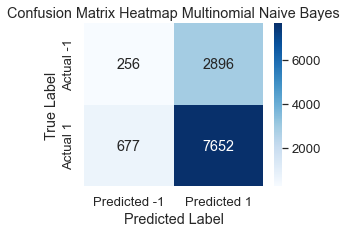

Logistic Regression Metrics:
  Accuracy: 0.9304
  Precision: 0.9313
  Recall: 0.9767
  F1-score: 0.9535


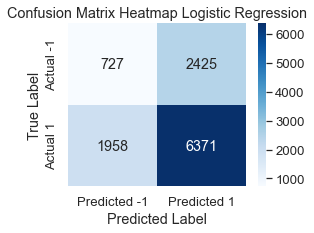

SVM Metrics:
  Accuracy: 0.9470
  Precision: 0.9537
  Recall: 0.9747
  F1-score: 0.9641


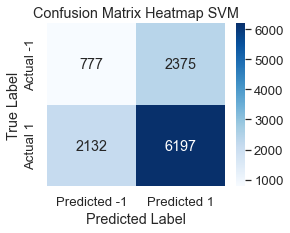

In [10]:
for name, model in models.items():
    model.fit(X_train_tfidf, y_train)
    predictions = model.predict(X_val_tfidf)
    
    accuracy = accuracy_score(y_val, predictions)
    precision = precision_score(y_val, predictions)
    recall = recall_score(y_val, predictions)
    f1 = f1_score(y_val, predictions)
    
    print(f"{name} Metrics:")
    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall: {recall:.4f}")
    print(f"  F1-score: {f1:.4f}")
    
    conf_matrix = confusion_matrix(y_test, predictions)
    
    # Plotting the heatmap
    sns.set(font_scale=1.2)  
    plt.figure(figsize=(4, 3))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Predicted -1", "Predicted 1"], yticklabels=["Actual -1", "Actual 1"])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix Heatmap {name}")
    plt.show()


- Result : SVM is the best model for now 

# Hyperparameter tuning

In [9]:
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import make_scorer, f1_score

### support vector machine (SVM)

- We will focus on twi parametres 

        - C : [0.1,1,2,10] 
        - Kernel : ['rbf','poly']
        
- We will use `RandomizedSearchCV` and divide the code into four sections because of the long running time.

---


#### The parameter distributions for RandomizedSearchCV & Create SVM classifier

In [ ]:
param_dist = {
    'C': [2, 10], 
    'kernel': ['rbf']
}

svm_classifier = SVC()

### Fit the randomized search to the data

In [ ]:
scoring = {'accuracy': 'accuracy', 'f1': make_scorer(f1_score)}

random_search = RandomizedSearchCV(
    svm_classifier,
    param_distributions=param_dist,
    n_iter=10,  # You can adjust the number of iterations
    cv=5,
    scoring=scoring,
    refit='accuracy',
    random_state=42  # Set a random seed for reproducibility
)

random_search.fit(X_train_tfidf, y_train)

### Print the best hyperparameters &  Print results for each combination of parameters

In [14]:
print("Best Parameters:")
print(random_search.best_params_)

cv_results = pd.DataFrame(random_search.cv_results_)
print("Randomized Search Results:")
print(cv_results[['params', 'mean_test_accuracy', 'mean_test_f1']])

C:\Users\pc\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best Parameters:
{'kernel': 'rbf', 'C': 2}
Randomized Search Results:
                       params  mean_test_accuracy  mean_test_f1
0   {'kernel': 'rbf', 'C': 2}            0.937660      0.958061
1  {'kernel': 'rbf', 'C': 10}            0.937585      0.958005


In [15]:
param_dist = {
    'C': [0.1, 1], 
    'kernel': ['rbf']
}


svm_classifier = SVC()

scoring = {'accuracy': 'accuracy', 'f1': make_scorer(f1_score)}

random_search = RandomizedSearchCV(
    svm_classifier,
    param_distributions=param_dist,
    n_iter=10,  
    cv=5,
    scoring=scoring,
    refit='accuracy',
    random_state=42 
)


random_search.fit(X_train_tfidf, y_train)


print("Best Parameters:")
print(random_search.best_params_)


cv_results = pd.DataFrame(random_search.cv_results_)
print("Randomized Search Results:")
print(cv_results[['params', 'mean_test_accuracy', 'mean_test_f1']])


C:\Users\pc\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best Parameters:
{'kernel': 'rbf', 'C': 1}
Randomized Search Results:
                        params  mean_test_accuracy  mean_test_f1
0  {'kernel': 'rbf', 'C': 0.1}            0.749669      0.853206
1    {'kernel': 'rbf', 'C': 1}            0.933684      0.955577


In [10]:
param_dist = {
    'C': [2, 10], 
    'kernel': ['poly']
}

svm_classifier = SVC()

scoring = {'accuracy': 'accuracy', 'f1': make_scorer(f1_score)}

random_search = RandomizedSearchCV(
    svm_classifier,
    param_distributions=param_dist,
    n_iter=10, 
    cv=5,
    scoring=scoring,
    refit='accuracy',
    random_state=42 
)


random_search.fit(X_train_tfidf, y_train)


print("Best Parameters:")
print(random_search.best_params_)


cv_results = pd.DataFrame(random_search.cv_results_)
print("Randomized Search Results:")
print(cv_results[['params', 'mean_test_accuracy', 'mean_test_f1']])


C:\Users\pc\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best Parameters:
{'kernel': 'poly', 'C': 2}
Randomized Search Results:
                        params  mean_test_accuracy  mean_test_f1
0   {'kernel': 'poly', 'C': 2}            0.797861      0.877881
1  {'kernel': 'poly', 'C': 10}            0.797600      0.877740


In [ ]:
param_dist = {
    'C': [0.1, 1], 
    'kernel': ['poly']
}


svm_classifier = SVC()

scoring = {'accuracy': 'accuracy', 'f1': make_scorer(f1_score)}

random_search = RandomizedSearchCV(
    svm_classifier,
    param_distributions=param_dist,
    n_iter=10,  
    cv=5,
    scoring=scoring,
    refit='accuracy',
    random_state=42  
)

random_search.fit(X_train_tfidf, y_train)

print("Best Parameters:")
print(random_search.best_params_)

cv_results = pd.DataFrame(random_search.cv_results_)
print("Randomized Search Results:")
print(cv_results[['params', 'mean_test_accuracy', 'mean_test_f1']])


In [17]:
best_svm_model = SVC(kernel='rbf',C=2)
best_svm_model.fit(X_train_tfidf,y_train)

SVC(C=2)

### Final evaluation on the test set

In [14]:
X_test_tfidf = tfidf_vectorizer.transform(X_test)
final_predictions = best_svm_model.predict(X_test_tfidf)
final_accuracy = accuracy_score(y_test, final_predictions)

print(f"Final Accuracy on Test Set: {final_accuracy:.4f}")
print("Classification Report:")
print(classification_report(y_test, final_predictions))

Final Accuracy on Test Set: 0.9391
Classification Report:
              precision    recall  f1-score   support

          -1       0.92      0.85      0.88      3152
           1       0.94      0.97      0.96      8329

    accuracy                           0.94     11481
   macro avg       0.93      0.91      0.92     11481
weighted avg       0.94      0.94      0.94     11481



# Logistic Regression 

In [11]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
}

scoring = {'accuracy': 'accuracy', 'f1': make_scorer(f1_score)}

grid_search = GridSearchCV(
    LogisticRegression(),
    param_grid,
    cv=5,
    scoring=scoring,
    refit='accuracy',  
)

grid_search.fit(X_train_tfidf, y_train)

print("Best Parameters:")
print(grid_search.best_params_)

cv_results = pd.DataFrame(grid_search.cv_results_)
print("Grid Search Results:")
print(cv_results[['params', 'mean_test_accuracy', 'mean_test_f1']])


C:\Users\pc\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\pc\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

Best Parameters:
{'C': 10, 'penalty': 'l2'}
Grid Search Results:
                           params  mean_test_accuracy  mean_test_f1
0   {'C': 0.001, 'penalty': 'l1'}                 NaN           NaN
1   {'C': 0.001, 'penalty': 'l2'}            0.727962      0.842567
2    {'C': 0.01, 'penalty': 'l1'}                 NaN           NaN
3    {'C': 0.01, 'penalty': 'l2'}            0.727962      0.842567
4     {'C': 0.1, 'penalty': 'l1'}                 NaN           NaN
5     {'C': 0.1, 'penalty': 'l2'}            0.825485      0.892393
6       {'C': 1, 'penalty': 'l1'}                 NaN           NaN
7       {'C': 1, 'penalty': 'l2'}            0.919480      0.946550
8      {'C': 10, 'penalty': 'l1'}                 NaN           NaN
9      {'C': 10, 'penalty': 'l2'}            0.936223      0.957101
10    {'C': 100, 'penalty': 'l1'}                 NaN           NaN
11    {'C': 100, 'penalty': 'l2'}            0.936148      0.956953


C:\Users\pc\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Final evaluation on the test set

In [12]:
best_lg_model = grid_search.best_estimator_
X_test_tfidf = tfidf_vectorizer.transform(X_test)
final_predictions = best_lg_model.predict(X_test_tfidf)
final_accuracy = accuracy_score(y_test, final_predictions)

print(f"Final Accuracy on Test Set: {final_accuracy:.4f}")
print("Classification Report:")
print(classification_report(y_test, final_predictions))

Final Accuracy on Test Set: 0.9389
Classification Report:
              precision    recall  f1-score   support

          -1       0.92      0.85      0.88      3152
           1       0.95      0.97      0.96      8329

    accuracy                           0.94     11481
   macro avg       0.93      0.91      0.92     11481
weighted avg       0.94      0.94      0.94     11481



# Multinomial naif bayes

In [12]:
param_grid_nb = {
    'alpha': [0.001, 0.01, 0.1, 1, 10, 100],
    'fit_prior': [True, False]
}

scoring_nb = {'accuracy': make_scorer(accuracy_score), 'f1': make_scorer(f1_score)}

grid_search_nb = GridSearchCV(
    MultinomialNB(),
    param_grid_nb,
    cv=5,
    scoring=scoring_nb,
    refit='accuracy',  
)

grid_search_nb.fit(X_train_tfidf, y_train)

print("Best Parameters:")
print(grid_search_nb.best_params_)

cv_results_nb = pd.DataFrame(grid_search_nb.cv_results_)
print("Grid Search Results:")
print(cv_results_nb[['params', 'mean_test_accuracy', 'mean_test_f1']])


Best Parameters:
{'alpha': 0.1, 'fit_prior': True}
Grid Search Results:
                                  params  mean_test_accuracy  mean_test_f1
0    {'alpha': 0.001, 'fit_prior': True}            0.921813      0.946034
1   {'alpha': 0.001, 'fit_prior': False}            0.902906      0.931187
2     {'alpha': 0.01, 'fit_prior': True}            0.911660      0.938188
3    {'alpha': 0.01, 'fit_prior': False}            0.884017      0.916020
4      {'alpha': 0.1, 'fit_prior': True}            0.929055      0.952374
5     {'alpha': 0.1, 'fit_prior': False}            0.921310      0.945182
6        {'alpha': 1, 'fit_prior': True}            0.792654      0.875252
7       {'alpha': 1, 'fit_prior': False}            0.867592      0.915682
8       {'alpha': 10, 'fit_prior': True}            0.730836      0.843971
9      {'alpha': 10, 'fit_prior': False}            0.775071      0.865254
10     {'alpha': 100, 'fit_prior': True}            0.727962      0.842567
11    {'alpha': 100, 'fit_pr

## Final evaluation on the test set

In [13]:
# Évaluation finale sur l'ensemble de test
best_NB_model = grid_search_nb.best_estimator_
X_test_tfidf = tfidf_vectorizer.transform(X_test)
final_predictions = best_NB_model.predict(X_test_tfidf)
final_accuracy = accuracy_score(y_test, final_predictions)

print(f"Final Accuracy on Test Set: {final_accuracy:.4f}")
print("Classification Report:")
print(classification_report(y_test, final_predictions))

Final Accuracy on Test Set: 0.9216
Classification Report:
              precision    recall  f1-score   support

          -1       0.96      0.74      0.84      3152
           1       0.91      0.99      0.95      8329

    accuracy                           0.92     11481
   macro avg       0.94      0.87      0.89     11481
weighted avg       0.92      0.92      0.92     11481



# Test the best_svm_model

In [51]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
from contractions import contractions_dict
import nltk

# nltk.download('punkt')
# nltk.download('stopwords')



def clean_text(text):
    # Convert to lowercase
    text = text.lower()

    # Expand contractions
    text = expand_contractions(text, contractions_dict)

    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Remove numbers
    text = re.sub(r'\d+', '', text)

    # Remove non-alphanumeric characters
    text = remove_non_alphanumeric(text)

    # Remove URLs
    text = remove_urls(text)

    # Remove stop words with English
    stop_words = set(stopwords.words('english'))  # You can replace 'english' with the appropriate language
    words = word_tokenize(text)
    filtered_words = [word for word in words if word.lower() not in stop_words]

    # Remove stop words with French
    stop_words = set(stopwords.words('french'))  # You can replace 'english' with the appropriate language
    words = word_tokenize(text)
    filtered_words = [word for word in words if word.lower() not in stop_words]

    # Remove short words
    text = remove_short_words(' '.join(filtered_words))

    # Lemmatization (optional)
    lemmatizer = nltk.WordNetLemmatizer()
    filtered_words = [lemmatizer.lemmatize(word) for word in filtered_words]

    # Join the words back into a string
    cleaned_text = ' '.join(filtered_words)

    return cleaned_text



contractions_dict = {
    "it's": "it is",
    "i'm": "i am",
    "don't": "do not",
    "won't": "will not",
    "can't": "cannot",
    "I'll": "I will",
    "you're": "you are",
    "he's": "he is",
    "she's": "she is",
    "we're": "we are",
    "they're": "they are",
    "isn't": "is not",
    "aren't": "are not",
    "wasn't": "was not",
    "weren't": "were not",
    "haven't": "have not",
    "hasn't": "has not",
    "hadn't": "had not",
    "could've": "could have",
    "should've": "should have",
    "would've": "would have",
    "didn't": "did not",
}

def expand_contractions(text, contractions_dict):
    words = text.split()
    expanded_text = [contractions_dict.get(word, word) for word in words]
    return ' '.join(expanded_text)


def remove_non_alphanumeric(text):
    return re.sub(r'[^a-zA-Z0-9\s]', '', text)


def remove_urls(text):
    return re.sub(r'http\S+', '', text)


def remove_short_words(text, min_length=2):
    words = text.split()
    long_words = [word for word in words if len(word) >= min_length]
    return ' '.join(long_words)



In [76]:
new_comments = ["I don't recommend it","new smartphone", 'I like it', "i hate it" ,"I don't like it ",'an issue, phone is not well','bad phone','good product , Thanks for it']

In [77]:
cleaned_new_comments = [clean_text(comment) if pd.notnull(comment) else '' for comment in new_comments]

In [78]:
cleaned_new_comments

['i do not recommend it',
 'new smartphone',
 'i like it',
 'i hate it',
 'i do not like it',
 'an issue phone is not well',
 'bad phone',
 'good product thanks for it']

In [79]:
new_comments_tfidf = tfidf_vectorizer.transform(new_comments)

In [80]:
new_comments

["I don't recommend it",
 'new smartphone',
 'I like it',
 'i hate it',
 "I don't like it ",
 'an issue, phone is not well',
 'bad phone',
 'good product , Thanks for it']

In [81]:
new_predictions = best_svm_model.predict(new_comments_tfidf)

# Display predictions
for comment, prediction in zip(new_comments, new_predictions):
    print(f"Comment: {comment}")
    print(f"Predicted Polarity: {prediction}")
    print()


Comment: I don't recommend it
Predicted Polarity: -1

Comment: new smartphone
Predicted Polarity: 1

Comment: I like it
Predicted Polarity: 1

Comment: i hate it
Predicted Polarity: -1

Comment: I don't like it 
Predicted Polarity: -1

Comment: an issue, phone is not well
Predicted Polarity: -1

Comment: bad phone
Predicted Polarity: -1

Comment: good product , Thanks for it
Predicted Polarity: 1



# Save the best_svm_model & tfidf_vectorizer

In [84]:
import pickle 

In [87]:
pickle.dump(best_model,open('model.pkl','wb'))

In [86]:
pickle.dump(tfidf_vectorizer,open('model_tfidf.pkl','wb'))